# Python Libraries 1

_May 13, 2020_ 

Agenda today:
- Introduction to Numpy: array math
- Introduction to Pandas: importing, indexing, and math

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part I. Numpy
The basic data structure that exist in numpy is called numpy arrays. NP arrays are very similar to python lists. The __difference__ between a python list and a Numpy array is that list can only a mix of data types but array can only contain the same data type.

But what is the benefits of using NumPy array instead of the base python lists?
- Speed 
- Broadcasting Property

In [3]:
names_list=['Bob','John','Sally']
names_array=np.char.array(['Bob','John','Sally']) #use numpy.array for numbers and numpy.char.array for strings
print(names_list)
print(names_array)

['Bob', 'John', 'Sally']
['Bob' 'John' 'Sally']


In [4]:
import time

size_of_seq = 100000

def pure_python_version():
    tic = time.time()
    X = range(size_of_seq)
    Y = range(size_of_seq)
    Z = [X[i] + Y[i] for i in range(len(X)) ]
    toc = time.time()
    return toc - tic

def numpy_version():
    tic = time.time()
    X = np.arange(size_of_seq)
    Y = np.arange(size_of_seq)
    Z = X + Y 
    toc = time.time()
    return toc - tic


t1 = pure_python_version()
t2 = numpy_version()
print("python: " + str(t1), "numpy: "+ str(t2))
print("Numpy is in this example " + str(t1/t2) + " times faster!")

python: 0.030702829360961914 numpy: 0.0008931159973144531
Numpy is in this example 34.37720234917245 times faster!


In [174]:
## broadcasting and array math

np.array([2,3,4,6]) * 5

array([10, 15, 20, 30])

In [175]:
li = [2,3,4,6]
li * 5

[2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6]

In [176]:
np.array([22, "annd", 32])

array(['22', 'annd', '32'], dtype='<U21')

### <font color='red'> *np.array will do automatic type coersion!!!!!*</font> ###

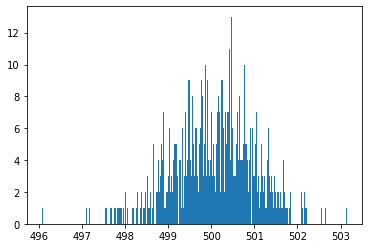

In [177]:
norm = np.random.normal(500, size=1000);
plt.hist(norm, bins = 500);

There are many other wonderous things numpy can do, you will encounter them later in the course of the program. 

## Part II. Pandas
Pandas stand for paneled data, and it is the most popular library for data scientists to manipulate, clean, and organize dataset in Python. The most fundamental data structure that exists in Pandas is called **DataFrames**. 

In [178]:
ls

5-12.md                        notes.md
Pandas_I.ipynb                 pandas_I_notes.md
Pandas_II.ipynb                practice2.md
Python_Fundamentals.ipynb      practice_file.md
Statistics_Fundamentals.ipynb  readme.md
auto-mpg.csv*


In [194]:
## importing data and look at optional parameters
df = pd.read_csv('auto-mpg.csv')

In [195]:
df.head()# examine and read the data


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [196]:
type(df['weight'])# examine the information in this dataframe


pandas.core.series.Series

In [197]:
# examine the datatypes of the dataframe


In [198]:
# talk about series and dataframe 


In [199]:
# indexing and subsetting 
df.iloc[3,2]

304.0

In [200]:
# examine whether we have missing value - it could really affect the data!
df[df.weight > 4000]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
25,10.0,8,360.0,215,4615,14.0,70,1,ford f250
...,...,...,...,...,...,...,...,...,...
231,15.5,8,400.0,190,4325,12.2,77,1,chrysler cordoba
232,16.0,8,351.0,149,4335,14.5,77,1,ford thunderbird
265,17.5,8,318.0,140,4080,13.7,78,1,dodge magnum xe
289,16.9,8,350.0,155,4360,14.9,79,1,buick estate wagon (sw)


In [201]:
def check(x):
    if x == '?':
        return 0
    else:
        return x
df = df.applymap(lambda x : check(x))
# df.horsepower.astype('int')
# but why do we still have anomaly in our data?


# try converting the datatype!

In [202]:
df.horsepower.astype('int')
df.horsepower.dtypes

dtype('O')

In [203]:
df.horsepower = df.horsepower.astype('int')
df.horsepower.dtypes

dtype('int64')

In [204]:
df.sort_values(by=['horsepower']).head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
126,21.0,6,200.0,0,2875,17.0,74,1,ford maverick
32,25.0,4,98.0,0,2046,19.0,71,1,ford pinto
336,23.6,4,140.0,0,2905,14.3,80,1,ford mustang cobra
374,23.0,4,151.0,0,3035,20.5,82,1,amc concord dl
330,40.9,4,85.0,0,1835,17.3,80,2,renault lecar deluxe


In [131]:
# how should we get rid of the anomaly in this case?

In [207]:
# exercise - get the cars that are heavier than 3000 but has a horsepower less than 150 
df[(df.weight > 4000) & (df.horsepower < 150)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
73,13.0,8,307.0,130,4098,14.0,72,1,chevrolet chevelle concours (sw)
74,13.0,8,302.0,140,4294,16.0,72,1,ford gran torino (sw)
88,14.0,8,302.0,137,4042,14.5,73,1,ford gran torino
115,15.0,8,350.0,145,4082,13.0,73,1,chevrolet monte carlo s
136,16.0,8,302.0,140,4141,14.0,74,1,ford gran torino
139,14.0,8,302.0,140,4638,16.0,74,1,ford gran torino (sw)
157,15.0,8,350.0,145,4440,14.0,75,1,chevrolet bel air
159,14.0,8,351.0,148,4657,13.5,75,1,ford ltd
187,17.5,8,305.0,140,4215,13.0,76,1,chevrolet chevelle malibu classic
213,13.0,8,350.0,145,4055,12.0,76,1,chevy c10
